## Observations and Insights 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df_ = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview

mouse_df_

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Checking the number of mice.
mouse_df_["Mouse ID"].nunique()


249

In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = mouse_df_[mouse_df_.duplicated(['Mouse ID', "Timepoint"])]
duplicateRows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [46]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRows.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_df = mouse_df_.drop(mouse_df_.index[904:921])
mouse_df = mouse_df_[mouse_df_["Mouse ID"] != "g989"]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Checking the number of mice in the clean DataFrame.
mouse_df = mouse_df.reset_index()
mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_tumor = mouse_df.loc[:, ['Tumor Volume (mm3)', 'Drug Regimen']]
rgroups=mouse_tumor.groupby("Drug Regimen")
# This method is the most straighforward, creating multiple series and putting them all together at the end.
t_rgroups=rgroups.mean()
t_rgroups["Mean"]=t_rgroups["Tumor Volume (mm3)"]
del t_rgroups["Tumor Volume (mm3)"]
t_rgroups["Median"]=rgroups["Tumor Volume (mm3)"].median()
t_rgroups["Variance"]=rgroups["Tumor Volume (mm3)"].var()
t_rgroups["Standard Deviation"]=rgroups["Tumor Volume (mm3)"].std()
t_rgroups["SEM"]=rgroups["Tumor Volume (mm3)"].sem()
t_rgroups.head(25)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [50]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
id_regimen = mouse_df.loc[:, ["Mouse ID", "Drug Regimen"]]
regimen_ = id_regimen.groupby("Drug Regimen")
regimen_.nunique()["Mouse ID"]
x_axis = np.arange(0,len(regimen_.nunique()["Mouse ID"]))



[]

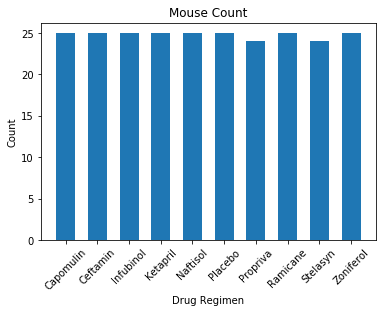

In [51]:
["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
plt.bar(x_axis, regimen_.nunique()["Mouse ID"], bottom=None, align='center', width=0.6)
ticks = [value for value in x_axis]
plt.xticks(ticks,["Capomulin","Ceftamin","Infubinol", "Ketapril","Naftisol","Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Mouse Count")
plt.margins(0.05)
plt.plot()

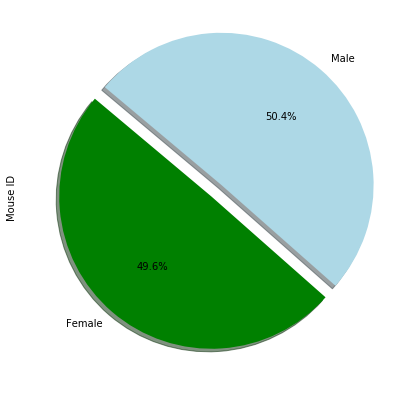

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors1 = ["green","lightblue"]
explode1 = [0,0.1]
fig, ax = plt.subplots(figsize=(15,7))
mouse_df.groupby(['Sex']).nunique()['Mouse ID'].plot(kind= "pie", ax=ax, colors=colors1, explode=explode1, autopct="%1.1f%%", shadow=True, startangle=140)


[]

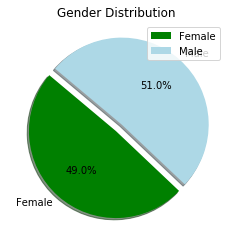

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data= mouse_df.groupby(['Sex'])
colors2 = ["green","lightblue"]
labels2 = ["Female", "Male"]
plt.pie(gender_data.count()["Mouse ID"], explode=explode1, colors=colors2, autopct="%1.1f%%", shadow=True, startangle=140,labels=labels2)
plt.title("Gender Distribution")
plt.legend()
plt.plot()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
r_lookup= mouse_df.set_index("Drug Regimen")
cric = r_lookup.loc[["Capomulin", "Ramicane", "Infubinol","Ceftamin"], ["Mouse ID","Tumor Volume (mm3)", "Timepoint"]]
# Start by getting the last (greatest) timepoint for each mouse
ft_cric = cric.drop_duplicates("Mouse ID", keep="last")
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ft_cric

,Mouse ID,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Capomulin,s185,23.343598,45
Capomulin,x401,28.484033,45
Capomulin,m601,28.430964,45
Capomulin,f966,30.485985,20
Capomulin,u364,31.023923,45
...,...,...,...
Ceftamin,x226,45.000000,0
Ceftamin,x581,64.634949,45
Ceftamin,x822,61.386660,45


In [55]:
column_names = ["Outlier Tumor"]
outlier_tumor = pd.DataFrame(columns = column_names)


cric1 = ft_cric.loc[["Capomulin"], ["Tumor Volume (mm3)"]]
quartiles = cric1["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq1 = quartiles[0.25]
upperq1 = quartiles[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)

outlier = cric1.loc[cric1["Tumor Volume (mm3)"] < lower_bound1]
outlier_tumor["Outlier Tumor"].append(outlier)
outlier = cric1.loc[cric1["Tumor Volume (mm3)"] > upper_bound1]
outlier_tumor["Outlier Tumor"].append(outlier)

cric2 = ft_cric.loc[["Ceftamin"], ["Tumor Volume (mm3)"]]
quartiles = cric2["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq2 = quartiles[0.25]
upperq2 = quartiles[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
outlier2 = cric2.loc[cric2["Tumor Volume (mm3)"] < lower_bound2]
outlier_tumor["Outlier Tumor"].append(outlier2)
outlier2 = cric2.loc[cric2["Tumor Volume (mm3)"] > upper_bound2]
outlier_tumor["Outlier Tumor"].append(outlier2)

cric3 = ft_cric.loc[["Ramicane"], ["Tumor Volume (mm3)"]]
quartiles = cric3["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq3 = quartiles[0.25]
upperq3 = quartiles[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
outlier3 = cric3.loc[cric3["Tumor Volume (mm3)"] < lower_bound3]
outlier_tumor["Outlier Tumor"].append(outlier3)
outlier3 = cric3.loc[cric3["Tumor Volume (mm3)"] > upper_bound3]
outlier_tumor["Outlier Tumor"].append(outlier3)

cric4 = ft_cric.loc[["Infubinol"], ["Tumor Volume (mm3)"]]
quartiles = cric4["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq4 = quartiles[0.25]
upperq4 = quartiles[0.75]
iqr4 = upperq4-lowerq4
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
outlier4 = cric4.loc[cric4["Tumor Volume (mm3)"] < lower_bound4]
outlier_tumor["Outlier Tumor"].append(outlier4)
outlier4 = cric4.loc[cric4["Tumor Volume (mm3)"] > upper_bound4]
outlier_tumor["Outlier Tumor"].append(outlier4)
outlier_tumor

,Outlier Tumor


In [56]:
#No outliers

In [57]:
del ft_cric ["Timepoint"]
#Note one this piece of code: it will run cleanly the first time through. If ran it a send time 
#without restarting the kernel, then it will draw an error because it will try to delete a column
#that has was already deleted the first run through.

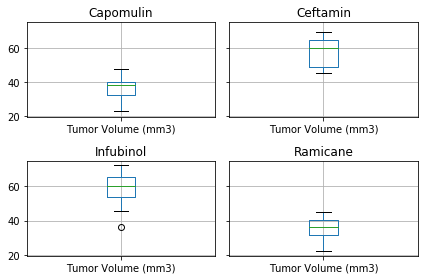

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
grouped_cric = ft_cric.groupby("Drug Regimen").boxplot()
plt.tight_layout()



## Line and Scatter Plots

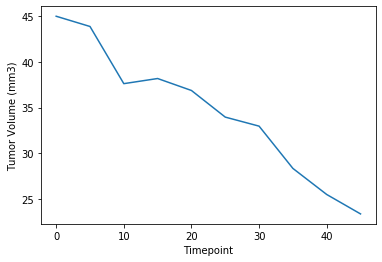

In [59]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap = r_lookup.loc[["Capomulin"],:]
cap = cap.set_index("Mouse ID")
mouse1=cap.loc[["s185"],["Tumor Volume (mm3)", "Timepoint"]]
timepoint= mouse1["Timepoint"]
#mouse_x = np.arange(0,len(mouse1["Tumor Volume (mm3)"]))
tumor = mouse1["Tumor Volume (mm3)"]
plt.plot(timepoint,tumor)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

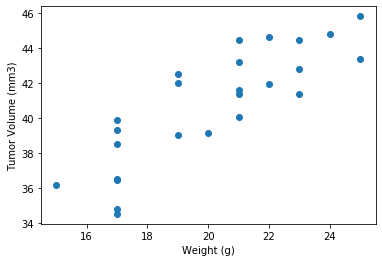

In [60]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_cap=cap.loc[:,["Tumor Volume (mm3)", "Weight (g)"]]
cap_groups = mouse_cap.groupby("Mouse ID")
cap_ave=cap_groups.mean()
weight = cap_ave["Weight (g)"]
tumor_ = cap_ave["Tumor Volume (mm3)"]
plt.scatter(weight, tumor_ )
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [61]:
# Calculate the correlation coefficient and linear regression model 
print(f"The correlation coefficient between the timepoint and volumne of the tumor is {round(st.pearsonr(timepoint, tumor)[0],2)}")
slope1, intercept1, r1, p1, std_err1 = st.linregress(timepoint, tumor)
print("The volume of the tumor can be calucated by multiplying the timpoint by " +str(round(slope1,2))+" and then adding" +str(round(intercept1,2)))  
print("The standard error is "+ str(round(std_err1,2)))



The correlation coefficient between the timepoint and volumne of the tumor is -0.98
The volume of the tumor can be calucated by multiplying the timpoint by -0.47 and then adding45.16
The standard error is 0.03


In [62]:
print(f"The correlation coefficient between the weight of the mouse and volumne of the tumor is {round(st.pearsonr(weight, tumor_)[0],2)}")
slope2, intercept2, r2, p2, std_err2 = st.linregress(weight, tumor_)
print("The volume of the tumor can be calucated by multiplying the weight by " +str(round(slope2,2))+" and then adding")
print(str(round(intercept2,2)))
print("The standard error is " + str(round(std_err2,2)))

The correlation coefficient between the weight of the mouse and volumne of the tumor is 0.84
The volume of the tumor can be calucated by multiplying the weight by 0.95 and then adding
21.55
The standard error is 0.13
